Confusion Matrix:
[[  95  106  363]
 [ 120  353  743]
 [ 417  793 3841]]


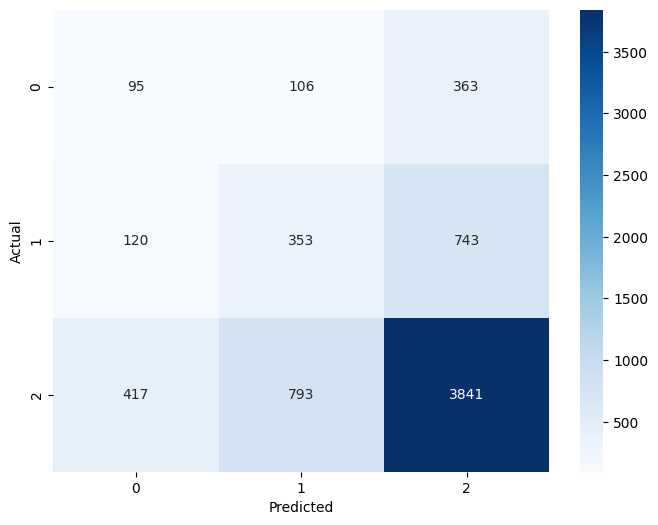

Classification Report:
              precision    recall  f1-score   support

        High       0.15      0.17      0.16       564
         Low       0.28      0.29      0.29      1216
      Medium       0.78      0.76      0.77      5051

    accuracy                           0.63      6831
   macro avg       0.40      0.41      0.40      6831
weighted avg       0.64      0.63      0.63      6831

Model Accuracy: 0.63


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'path_to_your_dataset.csv' with the correct file path
data = pd.read_csv('/content/Salary_Dataset_with_Extra_Features.csv')

# Convert 'Rating' into discrete classes using binning
bins = [0, 3.5, 4.5, 5.0]  # Define ranges
labels = ['Low', 'Medium', 'High']  # Labels for the bins
data['Rating'] = pd.cut(data['Rating'], bins=bins, labels=labels)

# Encode categorical columns
label_encoders = {}
for column in ['Company Name', 'Job Title', 'Location', 'Employment Status', 'Job Roles']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Encode the target column 'Rating'
rating_encoder = LabelEncoder()
data['Rating'] = rating_encoder.fit_transform(data['Rating'])

# Define features and target
X = data.drop('Rating', axis=1)
y = data['Rating']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate using confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=rating_encoder.classes_))


from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
